In [39]:
import os
from   sklearn.cluster import KMeans
import cv2 
import numpy as np
import imutils
from   skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv

In [40]:
#2Classes clustring 
def getimages(url):
    path_images = []
    with os.scandir(url) as listdir:
        for lis in listdir:
            path_images.append(url+lis.name)
    return path_images

In [41]:
Classes2 = getimages('2Classes/')

Classes4 = getimages('4Classes/')

In [42]:
def getColorMoments(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    feature = [np.mean(R), np.std(R), np.mean(G), np.std(G), np.mean(B), np.std(B)]
    return feature/np.mean(feature) 


def getTextureFeatures(img):
    glcm     = greycomatrix(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), [1], [0] ,symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')
    corre    = greycoprops(glcm , 'correlation')
    energy   = greycoprops(glcm , 'energy')
    Homogeneity      = greycoprops(glcm , 'homogeneity')
    texture_features = [contrast[0][0],corre[0][0],energy[0][0],Homogeneity[0][0] ]
    texture_features =  texture_features / sum(texture_features)
    return texture_features

def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])

    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist) 
    return hist.flatten()

def getShapeFeatures(img):
    image     = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    shapeFeat = cv2.HuMoments(cv2.moments(image)).flatten()
    shapeFeat = shapeFeat / np.mean(shapeFeat)
    return shapeFeat

def getFeatures(img):
    cm = getColorMoments(img)
    ch = extract_color_histogram(img)
    tx = getTextureFeatures(img)
    shape    = getShapeFeatures(img)
    features = np.append(cm, ch, axis=None)
    nv = np.append(features ,shape , axis =None)
    return np.append(nv ,tx ,axis = None)

def getf2(img):
    cm = getColorMoments(img)
    tx = getTextureFeatures(img)
    shape = getShapeFeatures(img)
    features = np.append(cm, tx, axis=None)
    return np.append(features ,shape ,axis = None)

In [43]:
# we need to extract feautres in all images
def getfeautresForClasses24(imagesclass):
    feutres_ = []
    for img in imagesclass:
        img     = cv2.imread(img)
        feutres = getFeatures(img)
        feutres_.append(feutres)
    return feutres_

In [44]:
Classes2Fe  = getfeautresForClasses24(Classes2)
Classes4Fe  = getfeautresForClasses24(Classes4)
Classes2Fe_ = np.array(Classes2Fe).reshape(200,-1)
Classes4Fe_ = np.array(Classes4Fe).reshape(400,-1)

Classes4Fe_.shape


(400, 529)

In [45]:
kmeans = KMeans(n_clusters=2 ,init = 'k-means++', max_iter=1000)
kmeans.fit(Classes2Fe_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
predictedClass2 = kmeans.labels_

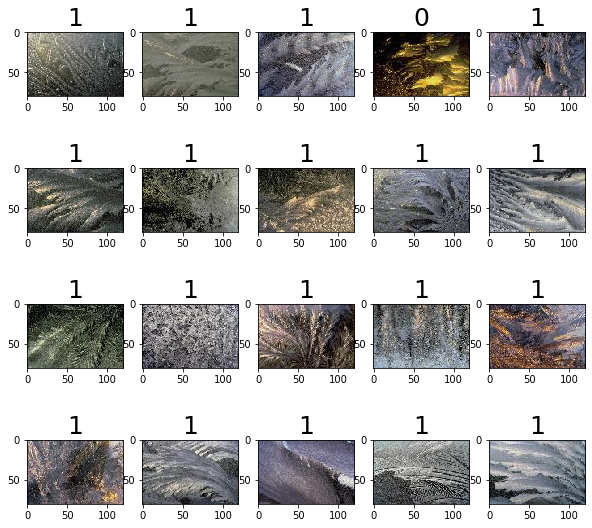

In [47]:
fig, axes = plt.subplots(4, 5, figsize = (10,10))
axes = axes.ravel()

for i in np.arange(0, 20): 
    axes[i].imshow(plt.imread(Classes2[i]))
    axes[i].set_title(predictedClass2[i], fontsize = 25)

plt.subplots_adjust(hspace=0)

In [48]:
kmeans4 = KMeans(n_clusters=4, init = 'k-means++', max_iter=1000)
kmeans4.fit(Classes4Fe_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
predictedClass4 = kmeans4.labels_
predictedClass4

array([2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1,
       1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,

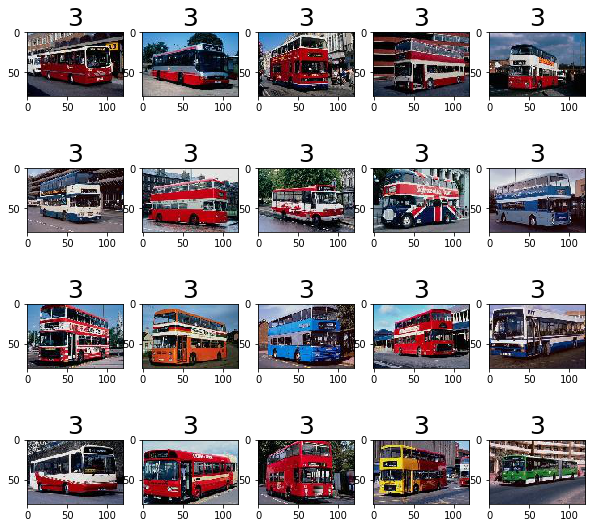

In [50]:
fig, axes = plt.subplots(4, 5, figsize = (10,10))
axes = axes.ravel()

for i in np.arange(0, 20): 
    axes[i].imshow(plt.imread(Classes4[i+200]))
    axes[i].set_title(predictedClass4[i+200], fontsize = 25)

plt.subplots_adjust(hspace=0)

In [55]:
with open('Predictions2CLASSES_Atelier3_abderrahim_laaz.csv', 'w', newline='') as file:
    fieldnames = ['image_name', 'Classe']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictedClass2)):
        writer.writerow({'image_name': Classes2[i], 'Classe': predictedClass2[i]})

In [56]:
with open('Predictions4CLASSES_Atelier3_abderrahim_laaz.csv', 'w', newline='') as file:
    fieldnames = ['image_name', 'Classe']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictedClass4)):
        writer.writerow({'image_name': Classes4[i], 'Classe': predictedClass4[i]})